In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade
!pip install datasets
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/twitter_multi_class_sentiment.csv")
# df = pd.read_csv('/content/IMDB_Dataset.csv')

from datasets import load_dataset

# Load the dataset
dataset = load_dataset("imdb")

# Combine train and test splits
train_df = dataset["train"].to_pandas()
test_df = dataset["test"].to_pandas()

# Concatenate the two DataFrames
df = pd.concat([train_df, test_df], ignore_index=True)

df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
49995,Just got around to seeing Monster Man yesterda...,1
49996,I got this as part of a competition prize. I w...,1
49997,I got Monster Man in a box set of three films ...,1
49998,"Five minutes in, i started to feel how naff th...",1


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


,0
text,0
label,0


In [4]:
# df['sentiment_id'] = (df['sentiment'] == 'positive').astype(int)

In [5]:
df['label'].value_counts()

,count
label,
0,25000
1,25000


# Dataset Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

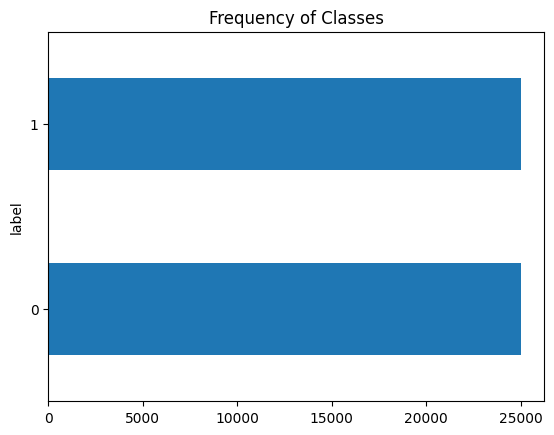

In [7]:
label_counts = df['label'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per review'}, xlabel='label'>

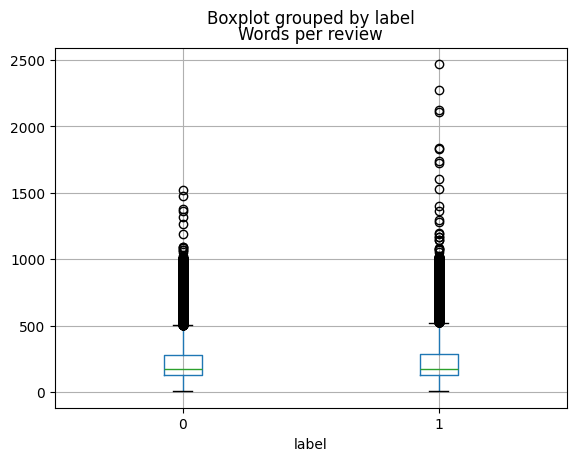

In [8]:
df['Words per review'] = df['text'].str.split().apply(len)
df.boxplot("Words per review", by="label")

#Text to Token Conversion

In [9]:
from transformers import AutoTokenizer

In [10]:
model_ckpt = "bert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [11]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and Train Test Split

In [12]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['label'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label'])
train.shape, test.shape, validation.shape

((35000, 3), (10000, 3), (5000, 3))

In [13]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [14]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'Words per review'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['text', 'label', 'Words per review'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'label', 'Words per review'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [15]:
dataset['train'][0]

{'text': '1996\'s MICHAEL is warm and winning comedy-fantasy that features one of my favorite performances from the John Travolta library. Travolta gives one of his breeziest and most likable performances as Michael, an archangel whose quiet existence at the home of a lonely innkeeper named Pansy (Jean Stapleton) is disrupted when Pansy reports Michael\'s presence in her home to a "National Enquirer"-like newspaper and the editor (Bob Hoskins) sends reporters (William Hurt, Andie McDowell, Robert Pastorelli) to the motel to check it out. Hurt, McDowell, and Pastorelli are quite good as the jaded news staffers who have a hard time accepting they\'ve met an angel but this is Travolta\'s show and he rules as the pot-bellied, sugar-eating, cookie-smelling, pie-loving, Aretha-loving, bull-chasing Michael, an angel who just isn\'t what you think you of when you think of angels. And you have to love the scene in the bar when he and the ladies dance to "Chain of Fools". I love this movie more 

In [16]:
def tokenize(batch):
    temp= tokenizer(batch['text'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 2727, 1005, 1055, 2745, 2003, 4010, 1998, 3045, 4038, 1011, 5913, 2008, 2838, 2028, 1997, 2026, 5440, 4616, 2013, 1996, 2198, 19817, 11431, 27914, 2050, 3075, 1012, 19817, 11431, 27914, 2050, 3957, 2028, 1997, 2010, 21986, 14272, 3367, 1998, 2087, 5622, 2912, 3468, 4616, 2004, 2745, 1010, 2019, 28185, 3005, 4251, 4598, 2012, 1996, 2188, 1997, 1037, 9479, 7601, 13106, 2315, 6090, 6508, 1006, 3744, 18785, 2669, 1007, 2003, 20275, 2043, 6090, 6508, 4311, 2745, 1005, 1055, 3739, 1999, 2014, 2188, 2000, 1037, 1000, 2120, 4372, 15549, 14544, 1000, 1011, 2066, 3780, 1998, 1996, 3559, 1006, 3960, 7570, 29334, 2015, 1007, 10255, 12060, 1006, 2520, 3480, 1010, 1998, 2666, 25005, 1010, 2728, 9220, 13348, 1007, 2000, 1996, 14901, 2000, 4638, 2009, 2041, 1012, 3480, 1010, 25005, 1010, 1998, 9220, 13348, 2024, 3243, 2204, 2004, 1996, 12323, 2094, 2739, 3095, 2545, 2040, 2031, 1037, 2524, 2051, 10564, 2027, 1005, 2310, 2777, 2019, 4850, 2021, 2023, 2003, 19817, 11431, 27914, 2050

In [17]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [18]:
df['sentiment'] = df['label'].apply(lambda x: 'positive' if x == 1 else 'negative')


# label2id = {x['label']:x['sentiment'] for x in dataset ['train']}
# id2label = {v:k for k,v in label2id.items()}

label2id = df.set_index('sentiment')['label'].to_dict()
id2label = {v: k for k, v in label2id.items()}

label2id, id2label

({'negative': 0, 'positive': 1}, {0: 'negative', 1: 'positive'})

#Model Building

In [19]:
from transformers import AutoModel
import torch

In [20]:
model= AutoModel.from_pretrained(model_ckpt)

# Instead of:
# model = AutoModel.from_pretrained(model_ckpt)

# Use:
# from transformers import AutoModelForSequenceClassification, AutoConfig

# num_labels = len(label2id)  # Assuming label2id is already defined
# config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels)
# model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [21]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [22]:
model.config
model_two="bert-base-cased"

In [23]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

# import torch
# from transformers import AutoModelForSequenceClassification, AutoConfig
# import torch_xla.core.xla_model as xm  # Import torch_xla

# # Number of labels and device configuration
# num_labels = len(label2id)
# device = xm.xla_device()  # Use TPU device

# # Load configuration with label mappings
# config = AutoConfig.from_pretrained(
#     model_ckpt,
#     label2id=label2id,
#     id2label=id2label
# )

# # Load the model and move it to TPU
# model = AutoModelForSequenceClassification.from_pretrained(
#     model_ckpt,
#     config=config
# ).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
device

device(type='cuda')

In [25]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:
from transformers import TrainingArguments

batch_size=16
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              # evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

In [27]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00


other than the above method, you can also use sklearn to calc accuracy

In [28]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [29]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

/tmp/ipython-input-29-3311494627.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [30]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: verma08rishabh11 (verma08rishabh11-indian-institute-of-technology-kanpur) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.303600
1000,0.229400
1500,0.207100
2000,0.190000
2500,0.159000
3000,0.111800
3500,0.117000
4000,0.118500


TrainOutput(global_step=4376, training_loss=0.17332746341851774, metrics={'train_runtime': 6723.1904, 'train_samples_per_second': 10.412, 'train_steps_per_second': 0.651, 'total_flos': 1.84177738752e+16, 'train_loss': 0.17332746341851774, 'epoch': 2.0})

In [31]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.21734687685966492,
 'test_accuracy': 0.9432,
 'test_f1': 0.9432,
 'test_runtime': 291.1877,
 'test_samples_per_second': 34.342,
 'test_steps_per_second': 2.146}

In [32]:
preds_output.predictions

array([[ 4.0168133 , -3.678237  ],
       [ 4.02658   , -3.681559  ],
       [-0.53695697,  0.78892285],
       ...,
       [-1.6347281 ,  1.6710453 ],
       [ 2.8641796 , -2.8119256 ],
       [-3.1041873 ,  2.97654   ]], dtype=float32)

In [34]:
import numpy as np
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5000
           1       0.94      0.94      0.94      5000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [36]:
label2id

{'negative': 0, 'positive': 1}

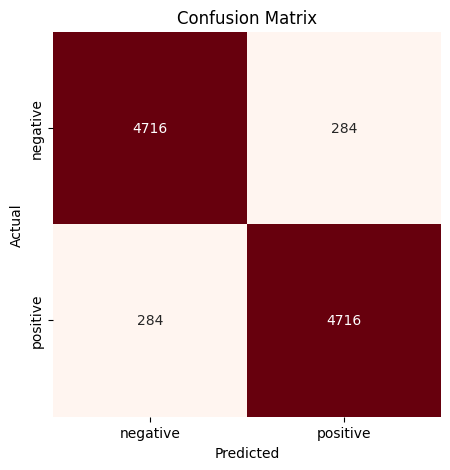

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

#Build Prediction function and save model

In [40]:
text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)

'positive'

In [41]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [42]:
# use pipeline for prediciton
from transformers import pipeline
classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9904778003692627},
 {'label': 'positive', 'score': 0.95845627784729},
 {'label': 'positive', 'score': 0.8961721658706665},
 {'label': 'positive', 'score': 0.6000911593437195}]

In [43]:
# make a file app.py, and use this code


# import streamlit as st
# from transformers import pipeline

# st.title("Fine-Tuning BERT for Twitter Sentiment Classification")

# classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')

# text = st.text_area("Enter Your Tweet Here")

# if st.button("Predict"):
#         result = classifier(text)
#         st.write("Prediction Result:", result)

#